In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.shape

(569, 33)

In [ ]:
X=df.drop(['diagnosis','Unnamed: 32'],axis=1)

In [ ]:
Y=df['diagnosis']
Y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_X=sc.fit_transform(X)
print(scaled_X)

[[-0.23640517  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [-0.23640344  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 0.43174109  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [-0.23572747  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [-0.23572517  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.24240586 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(scaled_X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-0.23596022, -1.15800874, -0.40948202, ..., -0.75548625,
        -0.01092926, -0.40485783],
       [-0.24242192, -0.94499809,  0.62606285, ..., -0.605352  ,
         0.10393316, -0.40596615],
       [-0.23590171,  0.57163772, -1.03080894, ..., -0.02597997,
        -0.19859181, -0.76616896],
       ...,
       [ 6.97028059, -1.33239345, -0.22564372, ..., -0.97581512,
        -0.72275273, -0.14329518],
       [-0.2361426 , -1.25173342, -0.24891439, ..., -1.74506282,
        -1.60444316, -1.01720262],
       [-0.23574078, -0.74334801,  1.07984094, ..., -0.27523937,
        -1.2760337 ,  0.1869831 ]])

In [ ]:
Y_train

338    B
427    B
406    B
96     B
490    B
      ..
277    M
9      M
359    B
192    B
559    B
Name: diagnosis, Length: 455, dtype: object

In [ ]:
tree_clf =  DecisionTreeClassifier(random_state=0,max_depth=3)


In [ ]:
tree_clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
names_features=X.columns
target_labels=Y.unique()

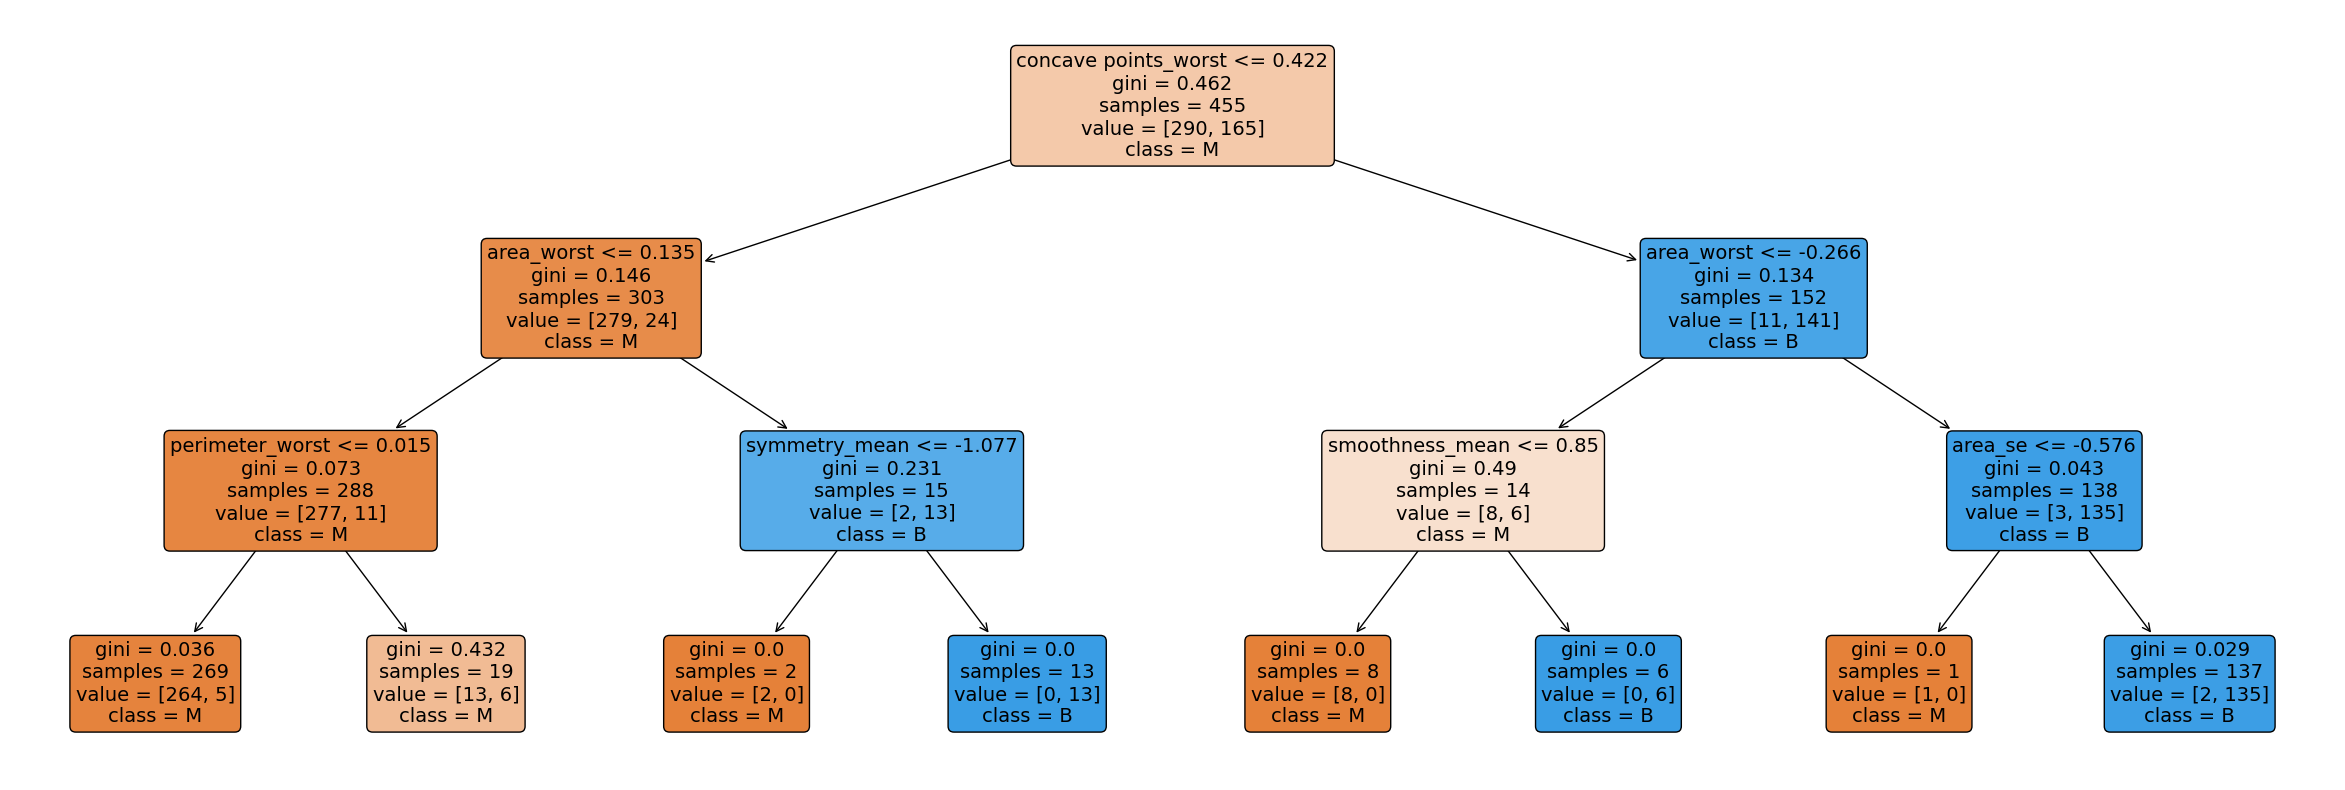

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
# Plot the decision tree graph
plt.figure(figsize=(30,10),facecolor='white')
Tree=tree.plot_tree(tree_clf,feature_names=names_features,class_names=target_labels,rounded=True,filled=True,fontsize=14)
plt.show()
y_pred=tree_clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9649122807017544


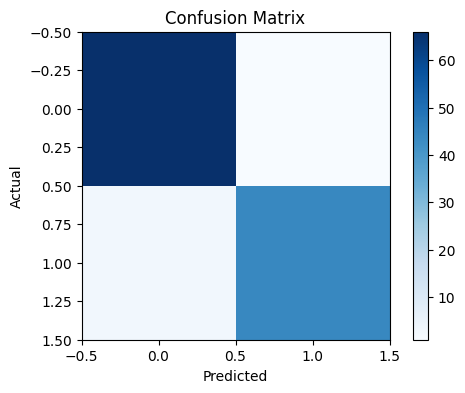

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()